In [275]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [276]:
# function for displaying a grayscale image
def showImage(img, width, height):
    plt.rcParams['figure.figsize'] = [width, height]
    plt.imshow(img, cmap='gray')
    plt.show()

In [277]:
# def convolution2D(img, kernal, rotate): 
#     # kernal should be rotated 180 degrees before applying to convolution
#     if rotate: 
#         newkernal = np.rot90(kernal, 2)
#     else: 
#         newkernal = kernal 
#     newimg = np.zeros(img.shape, dtype='uint8') 
#     kernal_size = kernal.shape[0]
#     padImg = np.pad(img, pad_width=kernal_size//2) # padding with zeros

#     for row in range(img.shape[0]):
#         for col in range(img.shape[1]):
#             extracted = padImg[row:row+kernal_size, col: col+kernal_size]
#             val = np.sum(extracted * newkernal)
#             # rounding off values to 8bit integers
#             newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
#     return newimg


In [278]:
def laplasian(img):
    kernal = np.array( [[0, 1, 0],
                        [1, -4, 1], 
                        [0, 1, 0]])

    newimg = np.zeros(img.shape, dtype='uint8') 
    kernal_size = kernal.shape[0]
    padImg = np.pad(img, pad_width=kernal_size//2, mode='edge') # replicate the border for padding
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernal_size, col: col+kernal_size]
            val = int(np.sum(extracted * kernal))
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg
    

In [279]:
def robertCross(img):
    kx = np.array([ [0, 0, 0], 
                    [0, -1, 0], 
                    [0, 0, 1]])
                    
    ky = np.array([ [0, 0, 0], 
                    [0, 0, -1], 
                    [0, 1, 0]])

    newimg = np.zeros(img.shape, dtype='uint8') 
    kernal_size = kx.shape[0]
    padImg = np.pad(img, pad_width=kernal_size//2, mode='edge') # replicate the border for padding

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernal_size, col: col+kernal_size]
            temp1 = int(np.sum(extracted * kx))
            temp2 = int(np.sum(extracted * ky))
            val = abs(temp1) + abs(temp2)
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg
    

In [280]:
def sobelOperator(img):
    kx = np.array([ [-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
                    
    ky = np.array([ [-1,-2,-1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

    newimg = np.zeros(img.shape, dtype='uint8') 
    kernal_size = kx.shape[0]
    padImg = np.pad(img, pad_width=kernal_size//2, mode='constant') # borders padded with zero

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernal_size, col: col+kernal_size]
            temp1 = int(np.sum(extracted * kx))
            temp2 = int(np.sum(extracted * ky))
            val = abs(temp1) + abs(temp2) # !!!!!!!!!!!
            # val = math.sqrt((temp1**2) + (temp2**2))
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg

In [281]:
if __name__ == '__main__':
    # reading the image
    girl = cv2.imread('girl.jpg', 0)
    # showImage(girl, 5, 5)

In [282]:
    # lap1 = laplasian(girl)
    # lap2 = cv2.Laplacian(girl, -1, borderType=cv2.BORDER_REPLICATE)
    # showImage(cv2.hconcat([lap1, lap2]), 10, 5)

In [283]:
    # result = cv2.subtract(girl,lap1) # substracting since center coefficient of mask is negative
    # showImage(cv2.hconcat([girl, result]), 10, 5)

In [284]:
    # rob1 = robertCross(girl)
    # showImage(rob1, 5, 5)
    # result = cv2.subtract(girl, rob1)
    # showImage(cv2.hconcat([rob1, girl, result]), 15, 5)

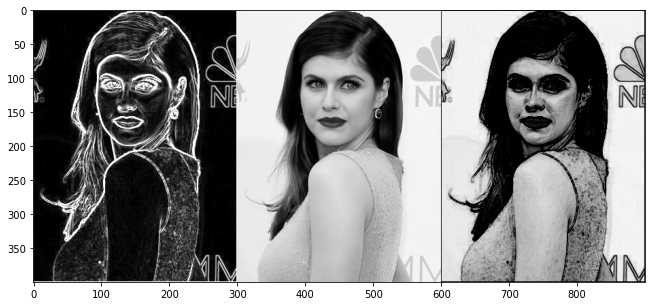

In [285]:
    sob1 = sobelOperator(girl)
    result = cv2.subtract(girl, sob1)
    showImage(cv2.hconcat([sob1, girl, result]), 15, 5) #! prolematic

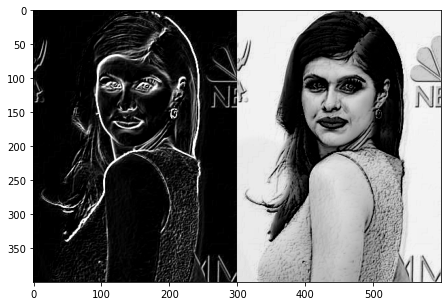

In [289]:
    sob2 = cv2.Sobel(girl, ddepth=-1, dx=1, dy=0, ksize=3, borderType=cv2.BORDER_REPLICATE)
    sob3 = cv2.Sobel(girl, ddepth=-1, dx=0, dy=1, ksize=3, borderType=cv2.BORDER_REPLICATE)
    sob4 = cv2.add(sob2, sob3)
    result = cv2.subtract(girl, sob4)
    showImage(cv2.hconcat([sob4, result]), 10, 5)